In [7]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sn

# Load data

In [2]:
data = pd.read_csv('data/data-final.csv',sep='\t')
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


# Get information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


# Analise data with IPC not 1

In [4]:
ipc = data[data['IPC']!=1].copy()

In [5]:
print(ipc['IPC'].info())

<class 'pandas.core.series.Series'>
Int64Index: 318496 entries, 4 to 1015338
Series name: IPC
Non-Null Count   Dtype
--------------   -----
318496 non-null  int64
dtypes: int64(1)
memory usage: 4.9 MB
None


In [6]:
ipc['IPC'].value_counts()

2      105868
3       34323
4       17332
5       11135
6        8064
        ...  
103       103
99         99
98         98
88         88
87         87
Name: IPC, Length: 200, dtype: int64

# Filter data with IPC = 1

In [7]:
data = data[data['IPC']==1]
data=data.reset_index(drop=True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05


# Get only columns with questions anwers

In [8]:
data = data.iloc[: , :50]

In [9]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696845 entries, 0 to 696844
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    695704 non-null  float64
 1   EXT2    695704 non-null  float64
 2   EXT3    695704 non-null  float64
 3   EXT4    695704 non-null  float64
 4   EXT5    695704 non-null  float64
 5   EXT6    695704 non-null  float64
 6   EXT7    695704 non-null  float64
 7   EXT8    695704 non-null  float64
 8   EXT9    695704 non-null  float64
 9   EXT10   695704 non-null  float64
 10  EST1    695704 non-null  float64
 11  EST2    695704 non-null  float64
 12  EST3    695704 non-null  float64
 13  EST4    695704 non-null  float64
 14  EST5    695704 non-null  float64
 15  EST6    695704 non-null  float64
 16  EST7    695704 non-null  float64
 17  EST8    695704 non-null  float64
 18  EST9    695704 non-null  float64
 19  EST10   695704 non-null  float64
 20  AGR1    695704 non-null  float64
 21  AGR2    69

# Drop empty values

In [11]:
data.isna().sum()

EXT1     1141
EXT2     1141
EXT3     1141
EXT4     1141
EXT5     1141
EXT6     1141
EXT7     1141
EXT8     1141
EXT9     1141
EXT10    1141
EST1     1141
EST2     1141
EST3     1141
EST4     1141
EST5     1141
EST6     1141
EST7     1141
EST8     1141
EST9     1141
EST10    1141
AGR1     1141
AGR2     1141
AGR3     1141
AGR4     1141
AGR5     1141
AGR6     1141
AGR7     1141
AGR8     1141
AGR9     1141
AGR10    1141
CSN1     1141
CSN2     1141
CSN3     1141
CSN4     1141
CSN5     1141
CSN6     1141
CSN7     1141
CSN8     1141
CSN9     1141
CSN10    1141
OPN1     1141
OPN2     1141
OPN3     1141
OPN4     1141
OPN5     1141
OPN6     1141
OPN7     1141
OPN8     1141
OPN9     1141
OPN10    1141
dtype: int64

In [12]:
data=data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695704 entries, 0 to 695703
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    695704 non-null  float64
 1   EXT2    695704 non-null  float64
 2   EXT3    695704 non-null  float64
 3   EXT4    695704 non-null  float64
 4   EXT5    695704 non-null  float64
 5   EXT6    695704 non-null  float64
 6   EXT7    695704 non-null  float64
 7   EXT8    695704 non-null  float64
 8   EXT9    695704 non-null  float64
 9   EXT10   695704 non-null  float64
 10  EST1    695704 non-null  float64
 11  EST2    695704 non-null  float64
 12  EST3    695704 non-null  float64
 13  EST4    695704 non-null  float64
 14  EST5    695704 non-null  float64
 15  EST6    695704 non-null  float64
 16  EST7    695704 non-null  float64
 17  EST8    695704 non-null  float64
 18  EST9    695704 non-null  float64
 19  EST10   695704 non-null  float64
 20  AGR1    695704 non-null  float64
 21  AGR2    69

# Analise data values

In [13]:
desc=pd.DataFrame()
desc['EXT_mean']=data.iloc[:,:10].mean(axis=1)
desc['EST_mean']=data.iloc[:,10:20].mean(axis=1)
desc['AGR_mean']=data.iloc[:,20:30].mean(axis=1)
desc['CSN_mean']=data.iloc[:,30:40].mean(axis=1)
desc['OPN_mean']=data.iloc[:,40:50].mean(axis=1)
desc.head()

,EXT_mean,EST_mean,AGR_mean,CSN_mean,OPN_mean
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.0,2.2,2.8,2.9,3.2


In [14]:
desc.describe()

,EXT_mean,EST_mean,AGR_mean,CSN_mean,OPN_mean
count,695704.000000,695704.000000,695704.000000,695704.000000,695704.000000
mean,3.014329,3.028722,3.148623,3.122273,3.285076
std,0.376670,0.664842,0.392588,0.419214,0.416480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.800000,2.600000,2.900000,2.900000,3.100000
50%,3.000000,3.000000,3.200000,3.100000,3.300000
75%,3.200000,3.500000,3.400000,3.400000,3.600000
max,5.000000,5.000000,5.000000,5.000000,5.000000


# Drop values with 0

In [15]:
data.loc[(data.iloc[:,:50]==0).any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92382 entries, 7 to 695694
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EXT1    92382 non-null  float64
 1   EXT2    92382 non-null  float64
 2   EXT3    92382 non-null  float64
 3   EXT4    92382 non-null  float64
 4   EXT5    92382 non-null  float64
 5   EXT6    92382 non-null  float64
 6   EXT7    92382 non-null  float64
 7   EXT8    92382 non-null  float64
 8   EXT9    92382 non-null  float64
 9   EXT10   92382 non-null  float64
 10  EST1    92382 non-null  float64
 11  EST2    92382 non-null  float64
 12  EST3    92382 non-null  float64
 13  EST4    92382 non-null  float64
 14  EST5    92382 non-null  float64
 15  EST6    92382 non-null  float64
 16  EST7    92382 non-null  float64
 17  EST8    92382 non-null  float64
 18  EST9    92382 non-null  float64
 19  EST10   92382 non-null  float64
 20  AGR1    92382 non-null  float64
 21  AGR2    92382 non-null  float64
 2

In [16]:
data=data.loc[(data.iloc[:,:50]!=0).all(axis=1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603322 entries, 0 to 695703
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    603322 non-null  float64
 1   EXT2    603322 non-null  float64
 2   EXT3    603322 non-null  float64
 3   EXT4    603322 non-null  float64
 4   EXT5    603322 non-null  float64
 5   EXT6    603322 non-null  float64
 6   EXT7    603322 non-null  float64
 7   EXT8    603322 non-null  float64
 8   EXT9    603322 non-null  float64
 9   EXT10   603322 non-null  float64
 10  EST1    603322 non-null  float64
 11  EST2    603322 non-null  float64
 12  EST3    603322 non-null  float64
 13  EST4    603322 non-null  float64
 14  EST5    603322 non-null  float64
 15  EST6    603322 non-null  float64
 16  EST7    603322 non-null  float64
 17  EST8    603322 non-null  float64
 18  EST9    603322 non-null  float64
 19  EST10   603322 non-null  float64
 20  AGR1    603322 non-null  float64
 21  AGR2    60

# Check data values again

In [17]:
desc=pd.DataFrame()
desc['EXT_mean']=data.iloc[:,:10].mean(axis=1)
desc['EST_mean']=data.iloc[:,10:20].mean(axis=1)
desc['AGR_mean']=data.iloc[:,20:30].mean(axis=1)
desc['CSN_mean']=data.iloc[:,30:40].mean(axis=1)
desc['OPN_mean']=data.iloc[:,40:50].mean(axis=1)
desc.describe()

,EXT_mean,EST_mean,AGR_mean,CSN_mean,OPN_mean
count,603322.000000,603322.000000,603322.000000,603322.000000,603322.000000
mean,3.030418,3.047360,3.167358,3.143082,3.309049
std,0.332895,0.641155,0.345340,0.375463,0.365274
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.800000,2.600000,3.000000,2.900000,3.100000
50%,3.000000,3.000000,3.200000,3.100000,3.300000
75%,3.200000,3.500000,3.400000,3.400000,3.600000
max,5.000000,5.000000,5.000000,5.000000,5.000000


# Save data

In [18]:
data.to_csv('data/results_fix_notzero.csv')  

# Generate answers from answer key

In [19]:
data['_EXT1']=data['EXT1']
data['_EXT2']=6-data['EXT2']
data['_EXT3']=data['EXT3']
data['_EXT4']=6-data['EXT4']
data['_EXT5']=data['EXT5']
data['_EXT6']=6-data['EXT6']
data['_EXT7']=data['EXT7']
data['_EXT8']=6-data['EXT8']
data['_EXT9']=data['EXT9']
data['_EXT10']=6-data['EXT10']

In [20]:
data['_EST1']=6-data['EST1']
data['_EST2']=data['EST2']
data['_EST3']=6-data['EST3']
data['_EST4']=data['EST4']
data['_EST5']=6-data['EST5']
data['_EST6']=6-data['EST6']
data['_EST7']=6-data['EST7']
data['_EST8']=6-data['EST8']
data['_EST9']=6-data['EST9']
data['_EST10']=6-data['EST10']

In [21]:
data['_AGR1']=6-data['AGR1']
data['_AGR2']=data['AGR2']
data['_AGR3']=6-data['AGR3']
data['_AGR4']=data['AGR4']
data['_AGR5']=6-data['AGR5']
data['_AGR6']=data['AGR6']
data['_AGR7']=6-data['AGR7']
data['_AGR8']=data['AGR8']
data['_AGR9']=data['AGR9']
data['_AGR10']=data['AGR10']

In [22]:
data['_CSN1']=data['CSN1']
data['_CSN2']=6-data['CSN2']
data['_CSN3']=data['CSN3']
data['_CSN4']=6-data['CSN4']
data['_CSN5']=data['CSN5']
data['_CSN6']=6-data['CSN6']
data['_CSN7']=data['CSN7']
data['_CSN8']=6-data['CSN8']
data['_CSN9']=data['CSN9']
data['_CSN10']=data['CSN10']

In [23]:
data['_OPN1']=data['OPN1']
data['_OPN2']=6-data['OPN2']
data['_OPN3']=data['OPN3']
data['_OPN4']=6-data['OPN4']
data['_OPN5']=data['OPN5']
data['_OPN6']=6-data['OPN6']
data['_OPN7']=data['OPN7']
data['_OPN8']=data['OPN8']
data['_OPN9']=data['OPN9']
data['_OPN10']=data['OPN10']

In [24]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN1,_OPN2,_OPN3,_OPN4,_OPN5,_OPN6,_OPN7,_OPN8,_OPN9,_OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,5.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,2.0


In [25]:
data[data.columns[[x.startswith("_EXT") for x in data.columns]]]

,_EXT1,_EXT2,_EXT3,_EXT4,_EXT5,_EXT6,_EXT7,_EXT8,_EXT9,_EXT10
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0
4,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
695699,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0
695700,5.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0
695701,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0
695702,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0


In [26]:
EXT=[]
EST=[]
AGR=[]
CSN=[]
OPN=[]
for index, row in data.iterrows():
    ext = sum(row[data.columns[[x.startswith("_EXT") for x in data.columns]]])
    est = sum(row[data.columns[[x.startswith("_EST") for x in data.columns]]])
    agr = sum(row[data.columns[[x.startswith("_AGR") for x in data.columns]]])
    csn = sum(row[data.columns[[x.startswith("_CSN") for x in data.columns]]])
    opn = sum(row[data.columns[[x.startswith("_OPN") for x in data.columns]]])
    EXT.append(ext)
    EST.append(est)
    AGR.append(agr)
    CSN.append(csn)
    OPN.append(opn)

data['EXT']=EXT
data['EST']=EST
data['AGR']=AGR
data['CSN']=CSN
data['OPN']=OPN

# Save results

In [27]:
data.to_csv('data/results_fix_notzero_final.csv')  

# Analise results

In [3]:
data = pd.read_csv('data/results_fix_notzero_final.csv', index_col=0)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN6,_OPN7,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,5.0,3.0,4.0,5.0,46.0,36.0,39.0,32.0,45.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,4.0,2.0,5.0,3.0,20.0,35.0,44.0,37.0,35.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,5.0,3.0,4.0,4.0,25.0,34.0,42.0,34.0,41.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,4.0,4.0,3.0,3.0,26.0,31.0,38.0,25.0,39.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,5.0,4.0,5.0,2.0,32.0,38.0,38.0,37.0,44.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603322 entries, 0 to 695703
Columns: 105 entries, EXT1 to OPN
dtypes: float64(105)
memory usage: 487.9 MB


['EXT' 'EST' 'AGR' 'CSN' 'OPN']
[29.13822304 29.18682395 37.58909836 33.42564667 39.38876421]


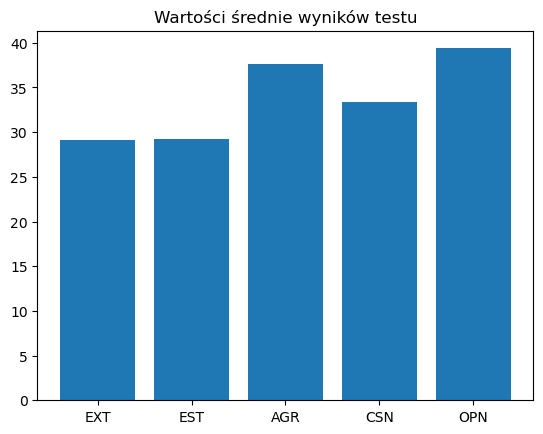

In [5]:
x = np.array(["EXT", "EST", 'AGR', "CSN", "OPN"])
y = np.array([data['EXT'].mean(), data['EST'].mean(), data['AGR'].mean(), data['CSN'].mean(), data['OPN'].mean()])
print(x)
print(y)
plt.title('Wartości średnie wyników testu')
plt.bar(x,y)
plt.show()

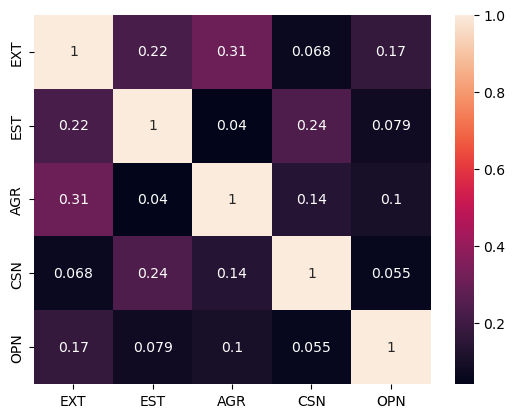

In [8]:
sn.heatmap(data.iloc[: , 100:105].corr(), annot=True)
plt.show()

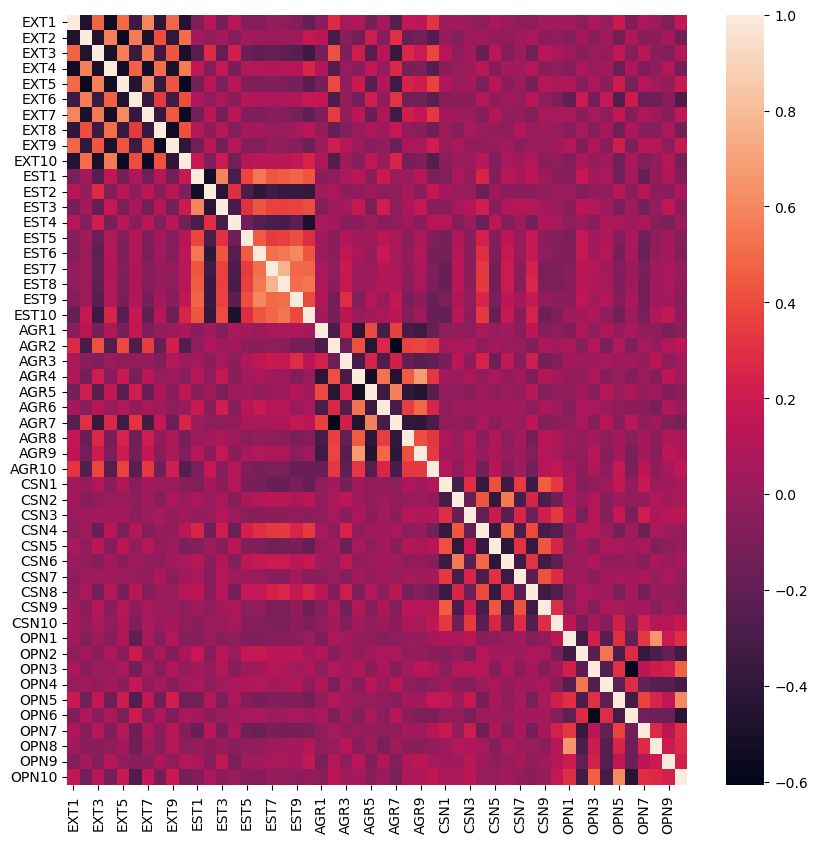

In [9]:
f, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data.iloc[: , 0:50].corr())
plt.show()

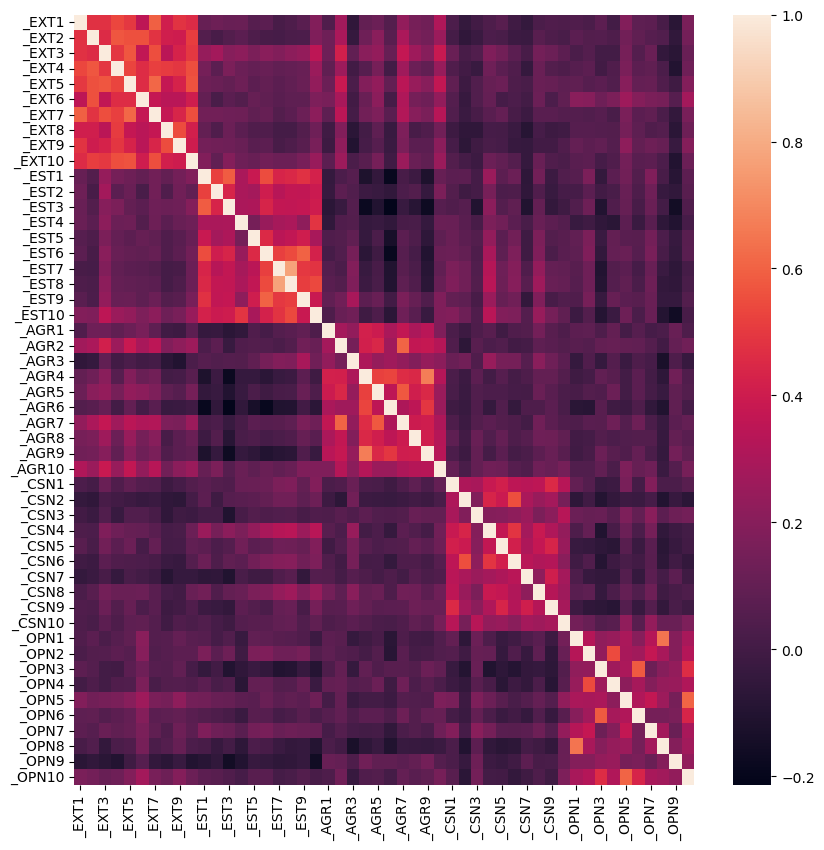

In [10]:
f, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data.iloc[: , 50:100].corr())
plt.show()